## Problem Statement - Price Prediction of the Medical Insurance

### Data Collection
Used the data set from Kaggle, which represents the results of a survery from a medical company which aims to identify the factors responsible for medical insurance price.

### Data Pre-Processing

#### Import necessary libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

In [6]:
datasetPath = r'Medical_insurance.csv'
df = pd.read_csv(datasetPath)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Dataset Description
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [8]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#Check Duplicate Value
df.duplicated().sum()

1435

In [10]:
#Remove Duplicate Value
df = df.drop_duplicates()

#Check Duplicate Value
df.duplicated().sum()

0

In [11]:
#Feature Engineering
#Creating a feature "weight_category" based on the Body Mass Index(BMI) value
df['weight_category'] = np.where(df['bmi'] < 18.000, 'underweight', np.where(df['bmi'] < 25.000, 'normal', np.where(df['bmi'] < 30.000, 'overweight', 'obese')))

/var/folders/g5/p0g0c4392y5f0nb8bl_8hw_h0000gn/T/ipykernel_73575/77055549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight_category'] = np.where(df['bmi'] < 18.000, 'underweight', np.where(df['bmi'] < 25.000, 'normal', np.where(df['bmi'] < 30.000, 'overweight', 'obese')))


In [12]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1337 non-null   int64  
 1   sex              1337 non-null   object 
 2   bmi              1337 non-null   float64
 3   children         1337 non-null   int64  
 4   smoker           1337 non-null   object 
 5   region           1337 non-null   object 
 6   charges          1337 non-null   float64
 7   weight_category  1337 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 94.0+ KB


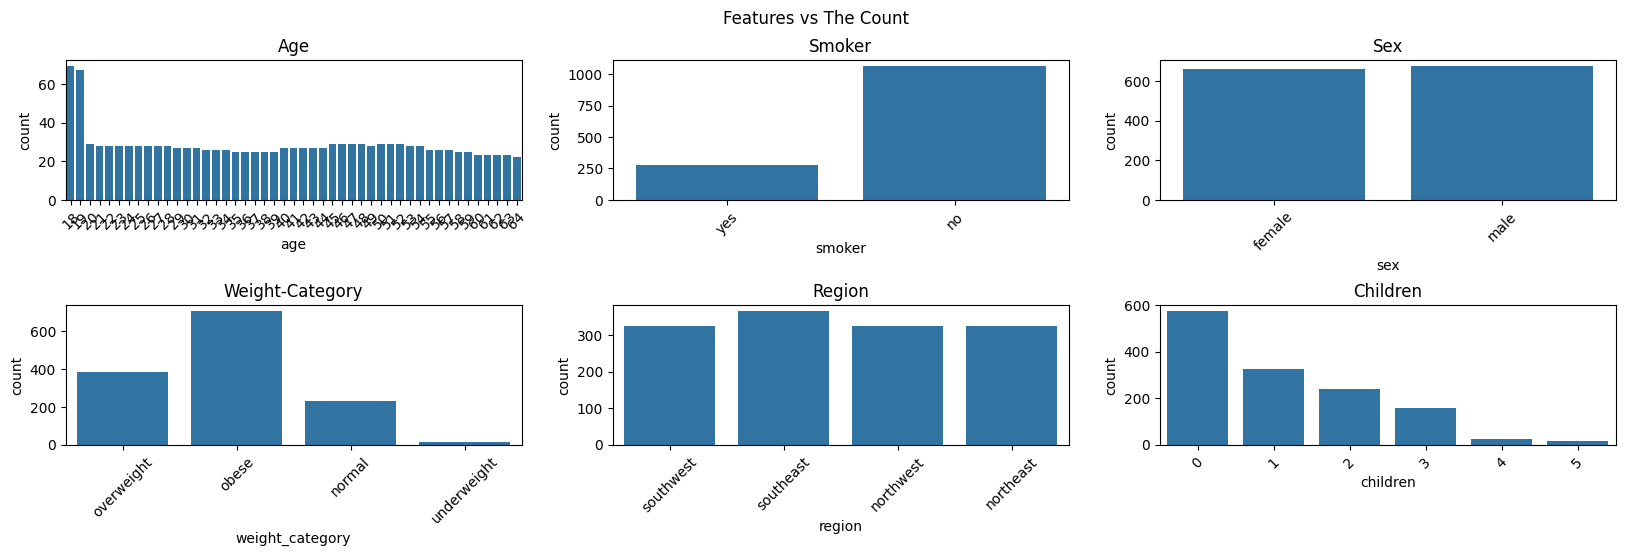

In [13]:
# Plotting the graphs for features which helps us identify the values that
# each feature has.
figr, axes = plt.subplots(2, 3, figsize=(20, 5))
figr.suptitle('Features vs The Count')

# Age
sns.countplot(ax=axes[0][0], x="age", data=df)
axes[0][0].set_title("Age")
axes[0][0].tick_params(axis='x', rotation=45)

# Smoker
sns.countplot(ax=axes[0][1], x="smoker", data=df)
axes[0][1].set_title("Smoker")
axes[0][1].tick_params(axis='x', rotation=45)

# Sex
sns.countplot(ax=axes[0][2], x="sex", data=df)
axes[0][2].set_title("Sex")
axes[0][2].tick_params(axis='x', rotation=45)

# Leave space between two rows
figr.subplots_adjust(hspace=0.75)

# Weight-Category
sns.countplot(ax=axes[1][0], x="weight_category", data=df)
axes[1][0].set_title("Weight-Category")
axes[1][0].tick_params(axis='x', rotation=45)

# Region
sns.countplot(ax=axes[1][1], x="region", data=df)
axes[1][1].set_title("Region")
axes[1][1].tick_params(axis='x', rotation=45)

# Children
sns.countplot(ax=axes[1][2], x="children", data=df)
axes[1][2].set_title("Children")
axes[1][2].tick_params(axis='x', rotation=45)

In [14]:
#Segregating values into numerical and categorial values
categorialVals = ["sex", "smoker", "region", "weight_category"]
df[categorialVals].describe()

,sex,smoker,region,weight_category
count,1337,1337,1337,1337
unique,2,2,4,4
top,male,no,southeast,obese
freq,675,1063,364,706


In [15]:
numericalVals = ["age", "bmi", "charges", "children"]
df[numericalVals].describe()

,age,bmi,charges,children
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,13279.121487,1.095737
std,14.044333,6.100468,12110.359656,1.205571
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.290000,4746.344000,0.000000
50%,39.000000,30.400000,9386.161300,1.000000
75%,51.000000,34.700000,16657.717450,2.000000
max,64.000000,53.130000,63770.428010,5.000000


#### Feature Transformation

In [16]:
dfTransformed = df.copy()

In [17]:
# Encoding the columns to make data easily available for ML algorithms
dfTransformed['smoker'] = dfTransformed['smoker'].replace({'yes' : 0, 'no' : 1})

sex_ori = pd.get_dummies(dfTransformed['sex'], prefix = 'sex')
region_ori = pd.get_dummies(dfTransformed['region'], prefix = 'reg')
status_ori = pd.get_dummies(dfTransformed['weight_category'], prefix = 'status')

#Concat Feature Encoding
dfTransformed = pd.concat([dfTransformed, sex_ori], axis=1)
dfTransformed = pd.concat([dfTransformed, region_ori], axis=1)
dfTransformed = pd.concat([dfTransformed, status_ori], axis=1)

In [18]:
# Remove the encoded features from the transformed dataframe
dfTransformed = dfTransformed.drop(columns = ['sex', 'region', 'weight_category'])

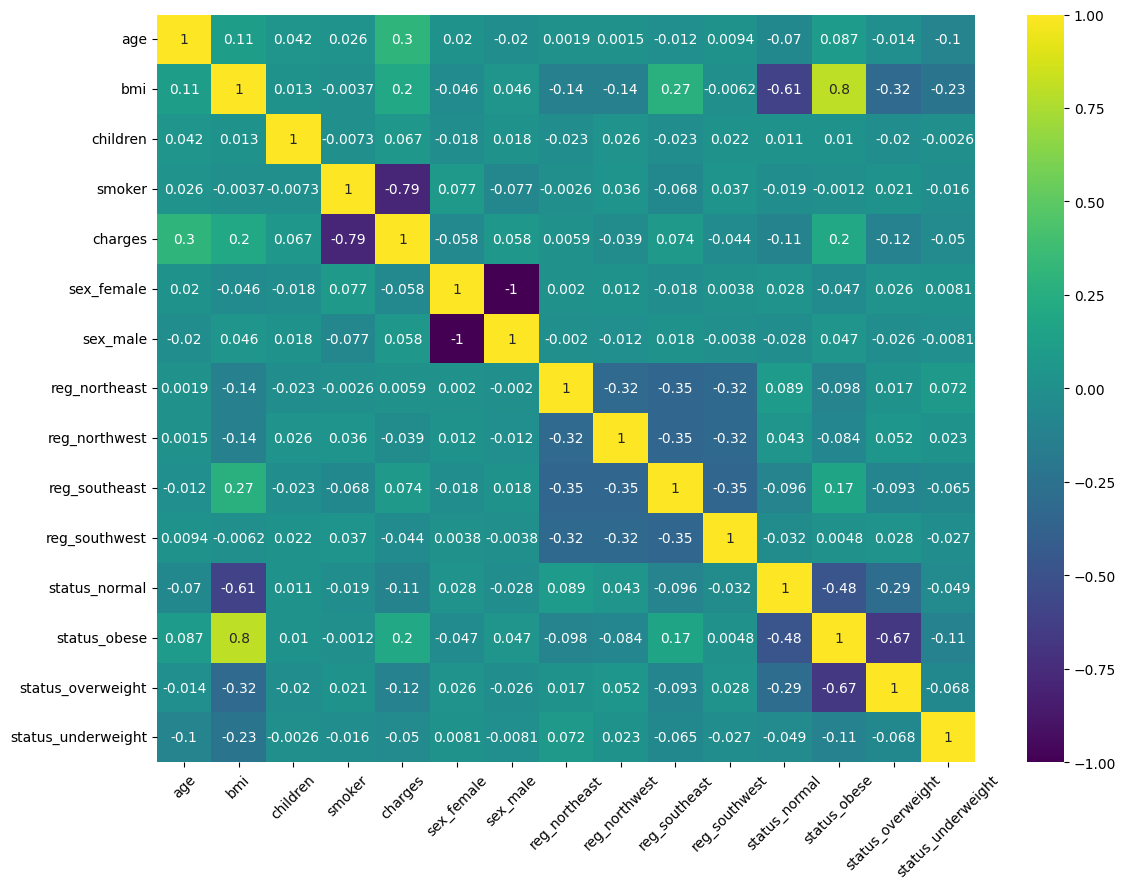

In [19]:
plt.figure(figsize=(12, 9))
sns.heatmap(dfTransformed.corr(numeric_only=True), annot=True, cmap="viridis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
dfTransformed

,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweight
0,19,27.900,0,0,16884.92400,True,False,False,False,False,True,False,False,True,False
1,18,33.770,1,1,1725.55230,False,True,False,False,True,False,False,True,False,False
2,28,33.000,3,1,4449.46200,False,True,False,False,True,False,False,True,False,False
3,33,22.705,0,1,21984.47061,False,True,False,True,False,False,True,False,False,False
4,32,28.880,0,1,3866.85520,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830,False,True,False,True,False,False,False,True,False,False
1334,18,31.920,0,1,2205.98080,True,False,True,False,False,False,False,True,False,False
1335,18,36.850,0,1,1629.83350,True,False,False,False,True,False,False,True,False,False
1336,21,25.800,0,1,2007.94500,True,False,False,False,False,True,False,False,True,False


#### Normalization

In [21]:
# Remove "charges" column from normalisation
normalisedGroups = dfTransformed.drop(columns = ['charges']).columns
print(normalisedGroups)

Index(['age', 'bmi', 'children', 'smoker', 'sex_female', 'sex_male',
       'reg_northeast', 'reg_northwest', 'reg_southeast', 'reg_southwest',
       'status_normal', 'status_obese', 'status_overweight',
       'status_underweight'],
      dtype='object')


In [22]:
# Performing normalisation
for i in range(len(normalisedGroups)):
    dfTransformed[normalisedGroups[i]] = MinMaxScaler().fit_transform(dfTransformed[normalisedGroups[i]].values.reshape(len(dfTransformed), 1))

In [23]:
dfTransformed

,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweight
0,0.021739,0.321227,0.0,0.0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.479150,0.2,1.0,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0.458434,0.6,1.0,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0.181464,0.0,1.0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0.347592,0.0,1.0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,1.0,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,1.0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,0.000000,0.562012,0.0,1.0,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,0.065217,0.264730,0.0,1.0,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Data Modeling